# World Happiness Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Concatenating data 

In [2]:
d15 = pd.read_csv(r"C:\Users\Newton\Desktop\DATA\Happy\2015.csv")
d16 = pd.read_csv(r"C:\Users\Newton\Desktop\DATA\Happy\2016.csv")
d17 = pd.read_csv(r"C:\Users\Newton\Desktop\DATA\Happy\2017.csv")
d18 = pd.read_csv(r"C:\Users\Newton\Desktop\DATA\Happy\2018.csv")
d19 = pd.read_csv(r"C:\Users\Newton\Desktop\DATA\Happy\2019.csv")

######  Fitting data to new columns

In [3]:
d15 = d15[['Country','Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
d16 = d16[['Country','Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
d17 = d17[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family','Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']]
d18 = d18[['Country or region','Overall rank','Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
d19 = d19[['Country or region','Overall rank','Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [4]:
newcoln = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family','Life Expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption']

In [5]:
d15.columns = newcoln
d16.columns = newcoln
d17.columns = newcoln
d18.columns = newcoln
d19.columns = newcoln

###### Assigning years 

In [6]:
d15['Year']=2015
d16['Year']=2016
d17['Year']=2017
d18['Year']=2018
d19['Year']=2019

In [7]:
df = pd.concat([d15, d16, d17, d18, d19], axis=0)

###### Dropping missing data.

In [8]:
df[df.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [9]:
df.dropna(axis = 0, inplace = True)

In [10]:
df[df.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year


# Data Exploration

In [11]:
df.head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [12]:
df.dtypes

Country                       object
Happiness Rank                 int64
Happiness Score              float64
GDP per Capita               float64
Family                       float64
Life Expectancy              float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
Year                           int64
dtype: object

In [13]:
df.shape

(781, 10)

In [14]:
df['Year'].value_counts()

2015    158
2016    157
2019    156
2018    155
2017    155
Name: Year, dtype: int64

## Exploratory Data Questions

### Does Money Buy Happiness?

In [15]:
def func(x):
    return df[df["Year"]==x]

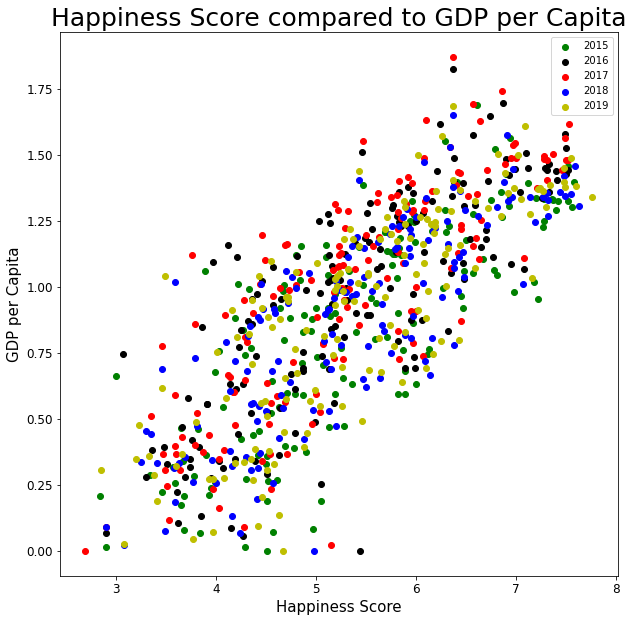

In [16]:
plt.figure(figsize=(10,10))


yrs = ['2015','2016','2017','2018','2019']
plt.scatter(x = func(2015)['Happiness Score'], y = func(2015)['GDP per Capita'],color = 'g')
plt.scatter(x = func(2016)['Happiness Score'], y = func(2016)['GDP per Capita'],color = 'k')
plt.scatter(x = func(2017)['Happiness Score'], y = func(2017)['GDP per Capita'],color = 'r')
plt.scatter(x = func(2018)['Happiness Score'], y = func(2018)['GDP per Capita'],color = 'b')
plt.scatter(x = func(2019)['Happiness Score'], y = func(2019)['GDP per Capita'],color = 'y')

plt.title('Happiness Score compared to GDP per Capita', fontsize = 25)

plt.xlabel('Happiness Score',fontsize= 15)
plt.ylabel('GDP per Capita', fontsize = 15)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(yrs, loc='best')

plt.show()

There is a poistive upward relationship between Happiness score and GDP per Capita. As below in the correlation chart you can see they are highly correlated.

### What factors determine the ranking most year by year?

In [17]:
yrgrp = df.groupby(by = 'Year')[['GDP per Capita','Family','Life Expectancy','Freedom','Generosity','Perceptions of corruption']].mean().reset_index()
yrgrp

,Year,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption
0,2015,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
1,2016,0.953880,0.793621,0.557619,0.370994,0.242635,0.137624
2,2017,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
3,2018,0.883677,1.216058,0.596877,0.455606,0.180974,0.112000
4,2019,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603


In [18]:
yrgrp = pd.melt(yrgrp, id_vars=['Year'], value_vars=['GDP per Capita','Family','Life Expectancy','Freedom','Generosity','Perceptions of corruption'], 
                var_name='names', value_name='values')
yrgrp.head(10)

,Year,names,values
0,2015,GDP per Capita,0.846137
1,2016,GDP per Capita,0.953880
2,2017,GDP per Capita,0.984718
3,2018,GDP per Capita,0.883677
4,2019,GDP per Capita,0.905147
5,2015,Family,0.991046
6,2016,Family,0.793621
7,2017,Family,1.188898
8,2018,Family,1.216058
9,2019,Family,1.208814


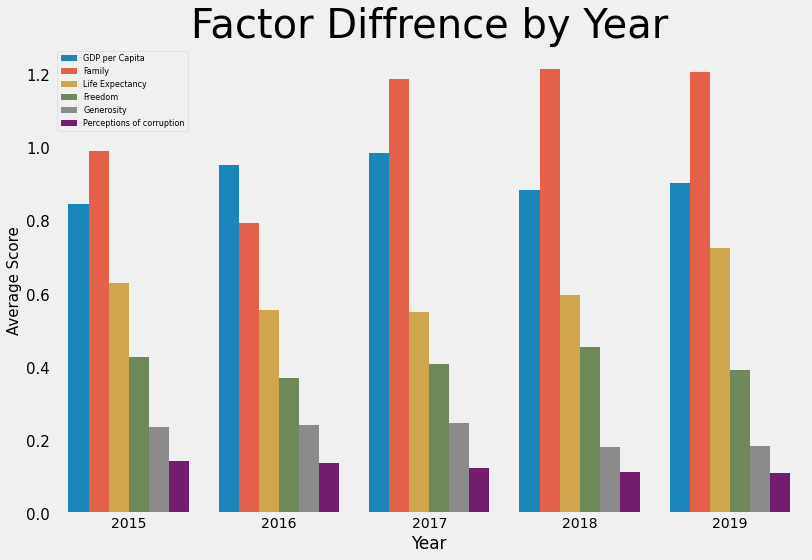

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))

ax = sns.barplot(x = yrgrp['Year'], y = yrgrp['values'],  hue =yrgrp['names'] )

plt.title("Factor Diffrence by Year", fontsize = 40)

plt.ylabel("Average Score", fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 8,loc='best')
plt.grid('')
plt.show()

### What values are most correlated

In [20]:
df.describe()

,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,78.773367,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436,2016.992318
std,45.162398,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816,1.417814
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000,2016.000000
50%,79.000000,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000,2017.000000
75%,118.000000,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030,2018.000000
max,158.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


[]

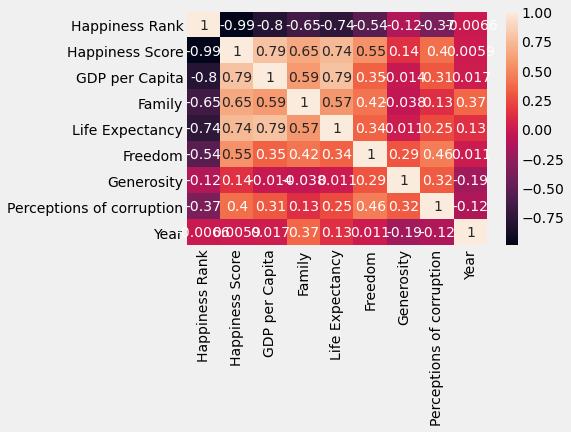

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.plot()

### Box plot of the values

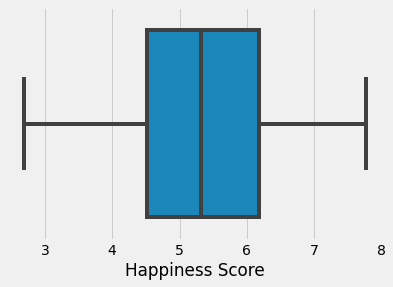

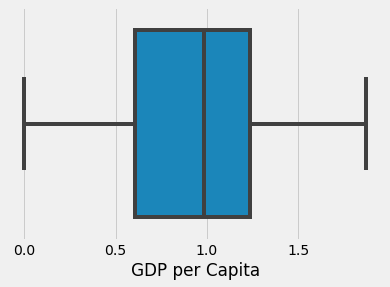

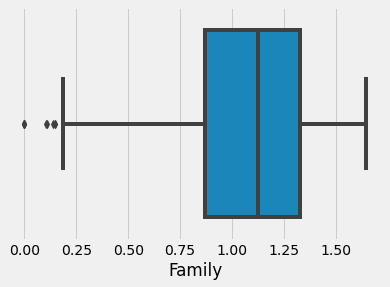

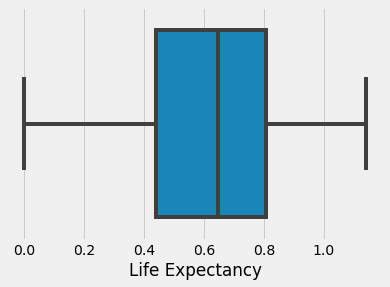

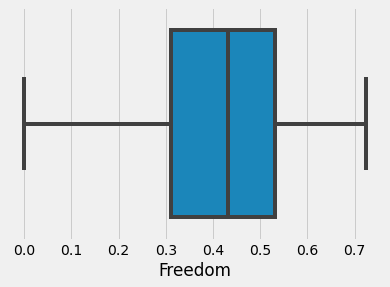

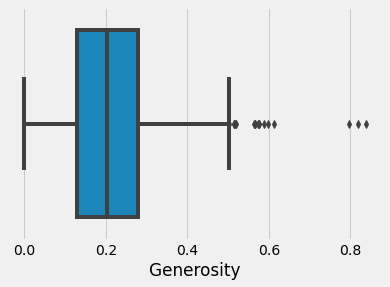

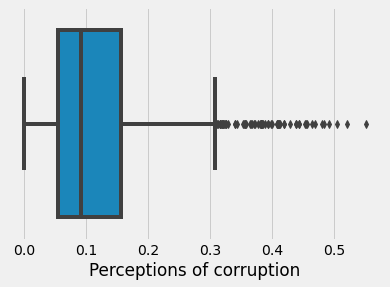

In [22]:
column_list = ["Happiness Score","GDP per Capita","Family","Life Expectancy","Freedom","Generosity","Perceptions of corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

### We see outliers in family, generosity, and perception of corruption that need to be dealt with.

In [23]:
x = df[df['Perceptions of corruption'] > 0.3]

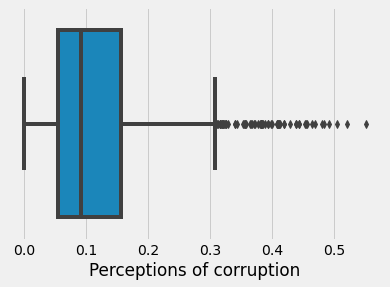

In [24]:
sns.boxplot(x = df[col])
plt.xlabel(col)
plt.show()

## What factor has the greatest magnitude in effecting the Happiness Score?

### Regression Analysis

In [26]:
df.drop(columns = ['Happiness Rank','Country','Year'], inplace=True)

###### Getting rid of outliers using z-score method

In [27]:
new_df = df.iloc[:,0:9]

from scipy import stats
z = np.abs(stats.zscore(new_df))
print(z)

[[1.96188502 1.18963704 0.82196314 ... 1.66423654 0.63902488 2.78343315]
 [1.9388016  0.95715133 0.9820261  ... 1.42341883 1.77968454 0.15143817]
 [1.90861559 1.01431631 0.85557272 ... 1.55828983 1.00373838 3.3866558 ]
 ...
 [1.93033488 1.39342504 1.70561673 ... 2.69122663 0.49558484 0.9497576 ]
 [2.03687374 2.1931423  3.2752781  ... 1.21883573 0.13393634 0.85519377]
 [2.24107323 1.50202862 1.52952319 ... 2.62578703 0.13585845 0.32563634]]


In [28]:
threshold = 3
np.where(z > 3)

(array([  2,  23,  27, 128, 147, 153, 158, 179, 190, 193, 276, 309, 312,
        340, 395, 428, 465, 469, 502, 598, 619, 623, 658, 779], dtype=int64),
 array([6, 6, 6, 5, 2, 6, 6, 6, 5, 6, 5, 6, 2, 6, 5, 5, 6, 2, 6, 5, 6, 2,
        6, 2], dtype=int64))

In [29]:
new_df = new_df[(z < 3).all(axis=1)]

###### Assigning X & Y values

In [30]:
X = new_df.iloc[:,1:9]
y = new_df['Happiness Score']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 6)
(228, 6)
(529,)
(228,)


In [34]:
#Calculating the intercept
print(model.intercept_)

2.1013889612305148


In [35]:
#Calculating the coefficients
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
GDP per Capita,1.001025
Family,0.672927
Life Expectancy,1.145641
Freedom,1.476127
Generosity,0.725380
Perceptions of corruption,1.456822


In [36]:
#Predicted Variables
predictions = model.predict(X_test)
predictions

array([5.84487246, 5.91539592, 6.01548341, 5.11186429, 6.41436573,
       5.90759746, 4.41826015, 5.86182853, 5.1525592 , 6.9936592 ,
       5.73919552, 4.4973498 , 5.18737538, 5.79679258, 6.55732634,
       6.04409695, 6.0843274 , 3.90465038, 5.90150516, 6.11011065,
       5.73836902, 4.80556642, 6.3190208 , 4.94094387, 5.45032031,
       4.26669648, 5.50455851, 4.49947021, 5.58016453, 6.78562158,
       4.39879   , 4.40299994, 7.0840545 , 4.318339  , 4.76249042,
       5.96880945, 7.18105533, 6.81879885, 4.82785781, 4.57706799,
       5.190682  , 5.38368802, 4.99375179, 5.63171643, 5.09288324,
       6.89200235, 5.96810687, 5.6486391 , 6.88522114, 6.47464543,
       4.13915664, 5.72554031, 5.74304114, 3.91602505, 3.63490586,
       5.69209536, 5.85217658, 5.75873594, 4.07316053, 5.56657883,
       5.58840415, 4.49730982, 6.36443078, 6.13814658, 6.02373596,
       4.21887078, 3.90234935, 7.24420723, 7.41666161, 4.07783121,
       5.74149245, 7.32524929, 5.69169903, 5.53694   , 6.66637

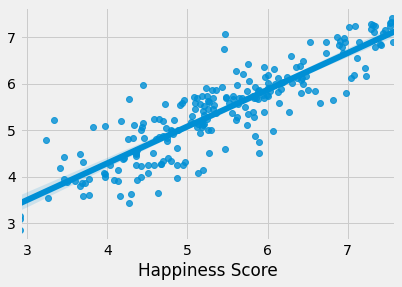

In [37]:
sns.regplot(y_test,predictions)
plt.show()

Low hetroskedasticity in the scatterplot

In [38]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     283.2
Date:                Thu, 17 Dec 2020   Prob (F-statistic):          1.47e-160
Time:                        09:14:18   Log-Likelihood:                -421.43
No. Observations:                 529   AIC:                             856.9
Df Residuals:                     522   BIC:                             886.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Interpretation:

The multiple linear regression model is showing the coefficient P-values are all statistically significant. The positive coefficients indicate that as the predictor variable increases, the happiness score variable also increases. For a one unit change in Freedom coefficient, the happiness score increased 1.4761 units holding all other factors constant.For a one unit change in the Perceptions of corruption score, the happiness score increased by 1.4568 holding all other factors constant. 